In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
k = 1
h = 1
B0 = 1
B1 = 1
w = 1
L = 8
theta_B = 40

nodos = 20

In [3]:
def eficiencia(perfil):
    perfil_inferior = B1*(1-np.linspace(0,1,nodos))
    P = 2*(perfil+perfil_inferior+w)
    A = (perfil_inferior+perfil)*w
    dx = L/nodos

    coeficientes = np.zeros((nodos,nodos))
    coeficientes[0,0] = 1 #Theta(0) = Theta_B
    
    coeficientes[-1,-1] = 3
    coeficientes[-1,-2] = -4
    coeficientes[-1,-3] = 1 #theta_i-2 - 4theta_i-1 + 3theta_i = 2theta_prima*deltaX

    constantes = np.zeros(nodos)
    constantes[0] = theta_B

    for i in range(1,nodos-1):

        coeficientes[i,i] = -2*A[i] - h*P[i]*dx**2/k
        coeficientes[i,i-1] = A[i]-(A[i+1]-A[i-1])/4
        coeficientes[i,i+1] = A[i]+(A[i+1]-A[i-1])/4

    A_inv = np.linalg.inv(coeficientes)
    Thetas = np.matmul(A_inv,constantes)
    
    Q = np.trapz(h*P*Thetas,np.linspace(0,L,nodos))
    Qm = np.trapz(h*P*theta_B,np.linspace(0,L,nodos))
    Eta = Q/Qm
    return Eta, Thetas

In [4]:
print(eficiencia(B0*np.ones(nodos)))

(0.08039602770173988, array([4.00000000e+01, 2.02715156e+01, 1.02733586e+01, 5.20641370e+00,
       2.63854741e+00, 1.33718388e+00, 6.77668602e-01, 3.43434257e-01,
       1.74048356e-01, 8.82056654e-02, 4.47016942e-02, 2.26545363e-02,
       1.14815557e-02, 5.81972193e-03, 2.95135467e-03, 1.49963765e-03,
       7.67746710e-04, 4.04374186e-04, 2.35101271e-04, 1.78676966e-04]))


In [5]:
perfil_prueba = B0*np.ones(nodos)
paso = 0.1
cambio = [] #1
etas = []
#cambio_min = 1E-4
iteraciones = 500

tiempo0 = time.time()

#while cambio > cambio_min:
for j in range(iteraciones):
    gradiente = [0]
    eta,thetas = eficiencia(perfil_prueba)
    etas.append(eta)
    for i in range(1,nodos):

        perfil_nuevo = perfil_prueba.copy()
        perfil_nuevo[i] += paso
        eta_i,thetas = eficiencia(perfil_nuevo)
        nabla_i = (eta_i-eta)
        #nabla_i *= (1.*(nabla_i<0))#*(1.*(perfil_nuevo[i]>0))
        if nabla_i*10 + perfil_prueba[i] <= 0 or nabla_i*10+perfil_prueba[i]>B0:
            nabla_i = 0
        gradiente.append(nabla_i)

    gradiente = np.array(gradiente)*20
    cambio.append(np.sum(np.abs(gradiente)))
    #print(cambio)
    perfil_prueba = perfil_prueba+gradiente
    #iteraciones += 1.
    
#     if iteraciones > 1000:
#         break

print('Tiempo por iteración = {:.2f}'.format((time.time()-tiempo0)/iteraciones))
print('Iteraciones = ' + str(iteraciones))

Tiempo por iteración = 0.46
Iteraciones = 500


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


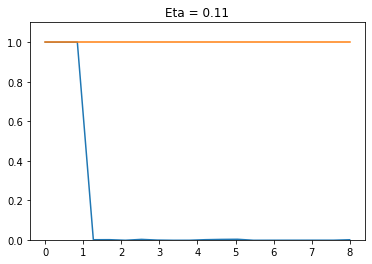

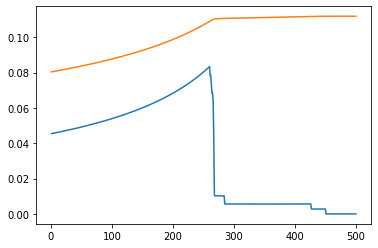

In [6]:
eta,thetas = eficiencia(perfil_prueba)

plt.figure()
plt.plot(np.linspace(0,L,20),perfil_prueba)
plt.plot(np.linspace(0,L,20),B0*np.ones(nodos))
plt.ylim(0,1.1)
plt.title('Eta = {:.2f}'.format(eta))
print(gradiente)

plt.figure()
plt.plot(np.linspace(1,len(cambio),len(cambio)),cambio)
plt.plot(np.linspace(1,len(cambio),len(cambio)),etas)

Text(0.5, 1.0, 'Eta = 0.08')

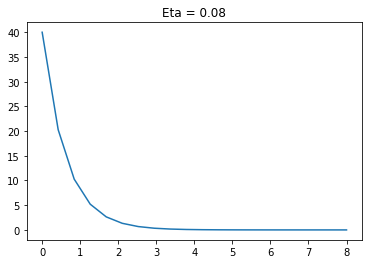

In [7]:
perfil = B0*np.ones(nodos)
eta,thetas = eficiencia(perfil)

plt.figure()
plt.plot(np.linspace(0,L,nodos),thetas)
plt.title('Eta = {:.2f}'.format(eta))